Make Train/Test split tolerant to cdr3 clusters. Expiriement with vj genes

MAIT:

TRAV1-2 TRBV6-4 TRAJ33 observed= 51 expected=11.35135135135135

TRAV1-2 TRBV6-4 TRAJ20 observed= 37 expected=8.91891891891892

NKT:

TRAV10 TRBV25-1 TRAJ18 observed= 13 expected=0.5848563968668408

Undefined:

TRAV14DV4 TRAJ22 TRBV15  observed= 20 expected=4.044652502700756

TRAV13-1 TRAJ56 TRBV10-3 observed= 19 expected=3.4489208633093527

TRAV22 TRAJ28 TRBV5-4 observed= 15 expected=2.6892

TRAV39 TRAJ45 TRBV20-1 observed= 36 expected=13.982224149143724

TRAV22 TRAJ28 TRBV5-8 observed= 15 expected=2.7224

-----------------------------------------------------------------

Undefined:
TRAV20 TRBV6-2/TRBV6-3 TRBJ1-1 observed= 61 expected=18.157911442628155

---------


TRAJ10 TRBV20-1 TRBJ1-4 observed= 30 expected=12.792596624931955

TRAJ40 TRBV10-3 TRBJ1-5 observed= 19 expected=5.982733812949641

---------


TRAV14DV4 TRAJ22 TRBJ2-3 observed= 44 expected=21.11111111111111

TRAV12-3 TRAJ18 TRBJ2-3 observed= 29 expected=11.79441698168072

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
import networkx as nx
from scipy.stats import poisson

%matplotlib inline

In [2]:
data_pd_full = pd.read_csv('data/MergedData.csv', index_col=0)

In [35]:
data_pd = pd.read_csv('data/MergedData.csv', index_col=0)
data_pd = data_pd.loc[data_pd['species'] == 'HomoSapiens']
data_pd = data_pd.loc[data_pd['database'] == 'tcr_ab_pairs']
# data_pd.index = np.arange(data_pd.shape[0])

In [36]:
antiindex = np.zeros((1 + data_pd.index[-1]), dtype=int)
for i, x in enumerate(data_pd.index):
    antiindex[x] = i

In [5]:
vgene_grouper = {'TRAV12-1':'TRAV12', 'TRAV12-2':'TRAV12', 'TRAV12-3':'TRAV12', 
                 'TRAV8-2':'TRAV8', 'TRAV8-3':'TRAV8', 'TRAV8-4':'TRAV8', 'TRAV8-6':'TRAV8', 
                 'TRAV38-2DV8,TRAV38-1':'TRAV38', 'TRAV38-1':'TRAV38', 'TRAV38-2DV8':'TRAV38', 
                 'TRAV1-1':'TRAV1', 'TRAV1-2':'TRAV1', 'TRAV1-2,TRAV1-1':'TRAV1'}

vgene_lists = data_pd['alpha.v'].values
for i in range(vgene_lists.shape[0]):
    vgenes = vgene_lists[i].split(',')
    for j in range(len(vgenes)):
        if vgenes[j] in vgene_grouper:
            vgenes[j] = vgene_grouper[vgenes[j]]
    vgene_lists[i] = ','.join(list(set(vgenes)))

data_pd['alpha.v'] = vgene_lists

In [6]:
badvgenes = np.where([len(x.split(',')) > 1 for x in data_pd['alpha.v']])[0]
print('number of droped samples:', len(badvgenes))
data_pd = data_pd.drop(data_pd.index[badvgenes])

number of droped samples: 408


In [ ]:
'''
vgene_sets = [set(x.split(',')) for x in data_pd['beta.v']]
where = lambda x:np.where([x in s for s in vgene_sets])[0]
bvgenes = set()
for x in set(data_pd['beta.v']):
    for g in x.split(','):
        bvgenes.add(g)
where_ = {x:where(x) for x in bvgenes}
for v1, v2 in itertools.product(bvgenes, repeat=2):
    if v1 != v2:
        a, b = where_[v1], where_[v2]
        intersection = len(set(a) & set(b))
        if intersection > len(a) *(1/2) or intersection > len(b) * (1/2):
            print(v1, v2, intersection, len(a), len(b))
'''

In [7]:
vgene_grouper = {'TRBV3-2':'TRBV3-1',
                 'TRBV4-3':'TRBV4-1', 'TRBV4-2':'TRBV4-1',
                 'TRBV5-8':'TRBV5-3', 'TRBV5-4':'TRBV5-3', 'TRBV5-6':'TRBV5-5', 'TRBV5-7':'TRBV5-5',
                 'TRBV6-6':'TRBV6-1', 'TRBV6-8':'TRBV6-1', 'TRBV6-5':'TRBV6-1', 'TRBV6-9':'TRBV6-1', 'TRBV6-3':'TRBV6-2',
                 'TRBV7-7':'TRBV7-6', 'TRBV7-8':'TRBV7-1', 'TRBV7-2':'TRBV7-1', 'TRBV7-4':'TRBV7-3',
                 'TRBV11-3':'TRBV11-1', 'TRBV11-2':'TRBV11-1',
                 'TRBV12-4':'TRBV12-3'}

vgene_lists = data_pd['beta.v'].values
for i in range(vgene_lists.shape[0]):
    vgenes = vgene_lists[i].split(',')
    for j in range(len(vgenes)):
        if vgenes[j] in vgene_grouper:
            vgenes[j] = vgene_grouper[vgenes[j]]
    vgene_lists[i] = ','.join(list(set(vgenes)))

data_pd['beta.v'] = vgene_lists

In [8]:
badvgenes = np.where([len(x.split(',')) > 1 for x in data_pd['beta.v']])[0]
print('number of droped samples:', len(badvgenes))
data_pd = data_pd.drop(data_pd.index[badvgenes])

number of droped samples: 5342


In [37]:
acdr3 = data_pd['alpha.cdr3'].values
bcdr3 = data_pd['beta.cdr3'].values
acdr3_length = np.array([len(x) for x in acdr3])
bcdr3_length = np.array([len(x) for x in bcdr3])

In [38]:
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X']
aa2num = {aa[i]:i for i in range(21)}

class PWM:
    def __init__(self, sequences):
        assert len(sequences) > 0
        self.l = len(sequences[0])
        PPM = np.ones((self.l, 21), dtype=float)
        for seq in sequences:
            assert len(seq) == self.l
            for pos in range(self.l):
                PPM[pos, aa2num[seq[pos]]] += 1
        self.PWM = np.log2(PPM)
    
    def Score(self, seq):
        assert self.l == len(seq)
        return sum([self.PWM[pos, aa2num[seq[pos]]] for pos in range(self.l)])

In [39]:
def sets(array):
    sets = [set(x.split(',')) for x in array]
    where_ = lambda x:set(np.where([x in s for s in sets])[0])
    values = set()
    for x in set(array):
        for g in x.split(','):
            values.add(g)
    return {x:where_(x) for x in values}

avsets = sets(data_pd['alpha.v'])
ajsets = sets(data_pd['alpha.j'])
bvsets = sets(data_pd['beta.v'])
bjsets = sets(data_pd['beta.j'])

In [40]:
class ValueMask:
    def __init__(self, values):
        self.values = values
    
    def index1(self, df):
        index = np.zeros((df.shape[0]), dtype=int)
        for column in self.values:
            index += [self.values[column] == x for x in df[column]]
        return index == len(self.values)
    
    def index(self, df):
        index = np.zeros((df.shape[0]), dtype=int)
        for column in self.values:
            index = index + [self.values[column] in set(x.split(',')) for x in df[column]]
        return index == len(self.values)

In [41]:
genetrios = [{'alpha.v':'TRAV1-2', 'beta.v':'TRBV6-4', 'alpha.j':'TRAJ33'},
{'alpha.v':'TRAV1-2', 'beta.v':'TRBV6-4', 'alpha.j':'TRAJ20'},
{'alpha.v':'TRAV10', 'beta.v':'TRBV25-1', 'alpha.j':'TRAJ18'},
{'alpha.v':'TRAV14DV4', 'alpha.j':'TRAJ22', 'beta.v':'TRBV15'},
{'alpha.v':'TRAV13-1', 'alpha.j':'TRAJ56', 'beta.v':'TRBV10-3'},
{'alpha.v':'TRAV22', 'alpha.j':'TRAJ28', 'beta.v':'TRBV5-4'},
{'alpha.v':'TRAV39', 'alpha.j':'TRAJ45', 'beta.v':'TRBV20-1'},
{'alpha.v':'TRAV22', 'alpha.j':'TRAJ28', 'beta.v':'TRBV5-8'},
{'alpha.v':'TRAV20', 'beta.v':'TRBV6-2', 'beta.j':'TRBJ1-1'},
{'alpha.v':'TRAV20', 'beta.v':'TRBV6-3', 'beta.j':'TRBJ1-1'},
{'alpha.j':'TRAJ10', 'beta.v':'TRBV20-1', 'beta.j':'TRBJ1-4'},
{'alpha.j':'TRAJ40', 'beta.v':'TRBV10-3', 'beta.j':'TRBJ1-5'},
{'alpha.v':'TRAV14DV4', 'alpha.j':'TRAJ22', 'beta.j':'TRBJ2-3'},
{'alpha.v':'TRAV12-3', 'alpha.j':'TRAJ18', 'beta.j':'TRBJ2-3'}]

In [42]:
genes_names = [','.join([genetrio[x] for x in genetrio]) for genetrio in genetrios]
names = ['EnrichedGeneTrio_' + genes_name + '.txt' for genes_name in genes_names]
names

['EnrichedGeneTrio_TRAV1-2,TRBV6-4,TRAJ33.txt',
 'EnrichedGeneTrio_TRAV1-2,TRBV6-4,TRAJ20.txt',
 'EnrichedGeneTrio_TRAV10,TRBV25-1,TRAJ18.txt',
 'EnrichedGeneTrio_TRAV14DV4,TRAJ22,TRBV15.txt',
 'EnrichedGeneTrio_TRAV13-1,TRAJ56,TRBV10-3.txt',
 'EnrichedGeneTrio_TRAV22,TRAJ28,TRBV5-4.txt',
 'EnrichedGeneTrio_TRAV39,TRAJ45,TRBV20-1.txt',
 'EnrichedGeneTrio_TRAV22,TRAJ28,TRBV5-8.txt',
 'EnrichedGeneTrio_TRAV20,TRBV6-2,TRBJ1-1.txt',
 'EnrichedGeneTrio_TRAV20,TRBV6-3,TRBJ1-1.txt',
 'EnrichedGeneTrio_TRAJ10,TRBV20-1,TRBJ1-4.txt',
 'EnrichedGeneTrio_TRAJ40,TRBV10-3,TRBJ1-5.txt',
 'EnrichedGeneTrio_TRAV14DV4,TRAJ22,TRBJ2-3.txt',
 'EnrichedGeneTrio_TRAV12-3,TRAJ18,TRBJ2-3.txt']

In [43]:
data_pd.shape

(169568, 14)

In [48]:
data_pd['genetrio'] = np.zeros((data_pd.shape[0]))
for i in range(len(genetrios)):
    vm = ValueMask(genetrios[i])
    data_pd.iloc[vm.index(data_pd), 14] = genes_names[i]

In [50]:
x = data_pd.loc[data_pd['genetrio'] != 0]

In [53]:
y = x[['genetrio', 'sample', 'alpha.cdr3', 'beta.cdr3',
       'alpha.v', 'alpha.j', 
       'beta.v', 'beta.d', 'beta.j']]

In [55]:
y.to_csv('EnrichGeneTrios.txt', sep='\t')

In [ ]:
for i in range(len(genetrios)):
    vm = ValueMask(genetrios[i])
    indexes = data_pd.index[vm.index(data_pd)
    data_pd.loc[indexes].to_csv(names[i], sep='\t')

In [77]:
indexes = set()
for genetrio in genetrios:
    vm = ValueMask(genetrio)
    indexes.update(data_pd.index[vm.index(data_pd)])

In [78]:
len(indexes)

359

In [80]:
data_pd.loc[indexes].to_csv('EnrichGeneTrios.txt', sep='\t')

In [56]:
pd.read_table('EnrichGeneTrios.txt')

,Unnamed: 0,genetrio,sample,alpha.cdr3,beta.cdr3,alpha.v,alpha.j,beta.v,beta.d,beta.j
0,289,"TRAV1-2,TRBV6-4,TRAJ20",3,CAVREEDYKLSF,CASSELAGGSDTQYF,TRAV1-2,TRAJ20,TRBV6-4,TRBD2,TRBJ2-3
1,332,"TRAV22,TRAJ28,TRBV5-8",3,CAVSLYSGAGSYQLTF,CASNPTGTGASRANVLTF,TRAV22,TRAJ28,"TRBV5-4,TRBV5-8",TRBD1,TRBJ2-6
2,509,"TRAV1-2,TRBV6-4,TRAJ33",3,CAVTLGNYQLIW,CASRTAGDTDTQYF,TRAV1-2,TRAJ33,TRBV6-4,"TRBD2,TRBD1",TRBJ2-3
3,557,"TRAV39,TRAJ45,TRBV20-1",3,CAVGDSGGGADGLTF,CSARVVGFEQYF,TRAV39,TRAJ45,TRBV20-1,NaN,TRBJ2-7
4,664,"TRAV14DV4,TRAJ22,TRBJ2-3",3,CAMKKGSARQLTF,CASSSGGLAGLGTDTQYF,TRAV14DV4,TRAJ22,"TRBV7-6,TRBV7-7,TRBV7-9",TRBD2,TRBJ2-3
5,1474,"TRAV20,TRBV6-3,TRBJ1-1",3,CAVQAANAGGTSYGKLTF,CASSYKRTVGNTEAFF,TRAV20,TRAJ52,"TRBV6-3,TRBV6-2,TRBV6-1",TRBD1,TRBJ1-1
6,2005,"TRAV20,TRBV6-3,TRBJ1-1",3,CAVQATQKLLF,CASSYSIRVGHTEAFF,TRAV20,TRAJ16,"TRBV6-3,TRBV6-2",NaN,TRBJ1-1
7,2109,"TRAJ10,TRBV20-1,TRBJ1-4",3,CVAGGGGGNKLTF,CSASAGVEKLFF,TRAV12-1,TRAJ10,TRBV20-1,"TRBD2,TRBD1",TRBJ1-4
8,2125,"TRAV1-2,TRBV6-4,TRAJ33",3,CAVPDSNYQLIW,CASSATSGGFNEQFF,TRAV1-2,TRAJ33,TRBV6-4,TRBD2,TRBJ2-1
9,3819,"TRAV20,TRBV6-3,TRBJ1-1",3,CAVHALSGGYNKLIF,CASSYTRTGGHTEAFF,TRAV20,TRAJ4,"TRBV6-3,TRBV6-2",TRBD1,TRBJ1-1


In [13]:
bigpv = set()
for av, bv, aj in itertools.product(avsets, bvsets, ajsets):
    e = len(avsets[av]) * len(bvsets[bv]) * len(ajsets[aj]) / data_pd.shape[0] ** 2
    r = len(avsets[av] & bvsets[bv] & ajsets[aj])
    if poisson.cdf(mu=e, k=r - 1) > 1-1e-2:
        # print(av, bv, aj, 'r=', r, 'e=', e)
        bigpv.add((av, bv, aj))

In [14]:
len(avsets) * len(bvsets) * len(ajsets)

165554

In [15]:
data_pd_full = data_pd_full.loc[data_pd_full['database'] != 'tcr_ab_pairs']

In [29]:
chech_avbvaj = []
for av, bv, aj in bigpv:
    em = len(avsets[av]) * len(bvsets[bv]) * len(ajsets[aj]) / data_pd.shape[0] ** 2
    ebv = len(avsets[av] & bvsets[bv]) * len(ajsets[aj] & bvsets[bv]) / len(bvsets[bv])
    eav = len(avsets[av] & bvsets[bv]) * len(ajsets[aj] & avsets[av]) / len(avsets[av])
    eaj = len(ajsets[aj] & avsets[av]) * len(ajsets[aj] & bvsets[bv]) / len(ajsets[aj])
    e = max(em, ebv, eav, eaj)
    r = len(avsets[av] & bvsets[bv] & ajsets[aj])
    if poisson.cdf(mu=e, k=r - 2) > 1-1e-5:
        print(av, bv, aj, 'observed=', r, 'expected={}'.format(e))
        chech_avbvaj.append((av, bv, aj))
        # bigpv.add((av, bv, aj))

TRAV14DV4 TRBV15 TRAJ22 observed= 20 expected=4.044652502700756
TRAV10 TRBV25-1 TRAJ18 observed= 13 expected=0.5848563968668408
TRAV1-2 TRBV6-4 TRAJ20 observed= 37 expected=8.91891891891892
TRAV13-1 TRBV10-3 TRAJ56 observed= 19 expected=3.4489208633093527
TRAV22 TRBV5-4 TRAJ28 observed= 15 expected=2.6892
TRAV39 TRBV20-1 TRAJ45 observed= 36 expected=13.982224149143724
TRAV1-2 TRBV6-4 TRAJ33 observed= 51 expected=11.35135135135135
TRAV22 TRBV5-8 TRAJ28 observed= 15 expected=2.7224


In [17]:
av, bv, aj = 'TRAV1-2', 'TRBV6-4', 'TRAJ33'
print(len(avsets[av]),  len(bvsets[bv]), len(avsets[av] & bvsets[bv]))
print(len(avsets[av] & bvsets[bv] & ajsets['TRAJ33']), len(avsets[av] & bvsets[bv] & ajsets['TRAJ20']))
ind = avsets[av] & bvsets[bv] & ajsets[aj]
data_pd.loc[data_pd.index[list(ind)]]

4383 814 132
51 37


,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
163730,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CASTDSNYQLIW,TRBV6-4,TRBD1,TRBJ2-2,CASSDSRGAGELFF
139203,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CASMDSNYQLIW,TRBV6-4,NaN,TRBJ2-1,CASSSYEENEQFF
142873,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CACQDSNYQLIW,TRBV6-4,NaN,TRBJ2-1,CASSDSVGSNEQFF
59242,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CAVKDSNYQLIW,TRBV6-4,TRBD2,TRBJ2-3,CASSDGLADSTDTQYF
63307,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CAVGDSNYQLIW,TRBV6-4,TRBD2,TRBJ2-1,CASSDRASGYNEQFF
100648,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CAVRGGDYQLIW,TRBV6-4,TRBD2,TRBJ2-1,CASSDGLAGDNEQFF
10617,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CAVPDGNYQLIW,TRBV6-4,TRBD2,TRBJ2-1,CASSDMGTSSYNEQFF
55701,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CALTDSNYQLIW,TRBV6-4,TRBD2,TRBJ2-1,CASSDGGSKSYNEQFF
107871,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CAHIDSNYQLIW,TRBV6-4,TRBD2,TRBJ2-1,CASSDGTSGISEQFF
21490,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV1-2,TRAJ33,CAVRDSNYQLIW,TRBV6-4,NaN,TRBJ1-1,CASSDSANTEAFF


These are MAIT cells.

In [26]:
for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
    align = search_similar(i, j)
    w = np.where(np.all(align, axis=1))[0]
    if w.shape[0] > 0:
        print(i, j, w)

CAVRDSNYQLIW CASSDSANTEAFF [46]
CAELDSNYQLIW CASASSSTDTQYF [ 153 2615]
CAVRDSNYQLIW CASSDGAEDTQYF [ 153 2615]
CASVDSNYQLIW CASSDSTGAGANVLTF [1067]
CAKMDSNYQLIW CASSGSENTEAFF [  46 1444 1532]
CAAKDSNYQLIW CASSDRENEQFF [1410]
CAVQDSNYQLIW CASSASEQDTQYF [2615]


In [22]:
data_pd_ep.loc[data_pd_ep.index[[46, 153, 2615, 1067, 46, 1444, 1532, 1410, 2615]]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
2747,"vdjdb_ab,vdjdb",HomoSapiens,NaN,NLVPMVATV,pp65,PBMC,CD8+,TRAV1-2*01,TRAJ33*01,CAVRDSNYQLIW,TRBV6-1*01,NaN,TRBJ1-1*01,CASSDAENTEAFF
9319,vdjdb,MusMusculus,NaN,LSLRNPILV,F2,BAL,CD8+,TRAV11*02,TRAJ33*01,CVVGDSNYQLIW,TRBV29*01,NaN,TRBJ2-5*01,CASSSGGGDTQYF
140925,vdjdb,MusMusculus,NaN,LSLRNPILV,F2,BAL,CD8+,TRAV11*02,TRAJ33*01,CVVGDSNYQLIW,TRBV29*01,NaN,TRBJ2-5*01,CASSSGRGDTQYF
58677,"vdjdb_ab,vdjdb",HomoSapiens,NaN,CVNGSCFTV,NA-231,PBMC,CD8+,TRAV1-2*01,TRAJ33*01,CAPMDSNYQLIW,TRBV19*01,NaN,TRBJ2-6*01,CASSNSEGSGANVLTF
2747,"vdjdb_ab,vdjdb",HomoSapiens,NaN,NLVPMVATV,pp65,PBMC,CD8+,TRAV1-2*01,TRAJ33*01,CAVRDSNYQLIW,TRBV6-1*01,NaN,TRBJ1-1*01,CASSDAENTEAFF
78928,vdjdb,MusMusculus,NaN,LSLRNPILV,F2,BAL,CD8+,TRAV5N-4*01,TRAJ33*01,CAASALDSNYQLIW,TRBV19*01,NaN,TRBJ1-1*01,CASSPGQNTEVFF
83334,vdjdb,MusMusculus,NaN,LSLRNPILV,F2,BAL,CD8+,TRAV5N-4*01,TRAJ33*01,CAADMDSNYQLIW,TRBV19*01,NaN,TRBJ1-1*01,CASAGGANTEVFF
77065,"vdjdb_ab,vdjdb",HomoSapiens,NaN,NLVPMVATV,NaN,PBMC,NaN,TRAV1-2*01,NaN,CAVRDSNYQLIW,TRBV6-2*01,NaN,NaN,CASSDRETYEQYF
140925,vdjdb,MusMusculus,NaN,LSLRNPILV,F2,BAL,CD8+,TRAV11*02,TRAJ33*01,CVVGDSNYQLIW,TRBV29*01,NaN,TRBJ2-5*01,CASSSGRGDTQYF


In [411]:
print(gene2seq['TRAJ33'])
print(gene2seq['TRAJ20'])

DSNYQLIWGAGTKLIIKP
SNDYKLSFGAGTTVTVRA


In [30]:
for av, bv, aj in chech_avbvaj:
    ind = avsets[av] & bvsets[bv] & ajsets[aj]
    for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
        align = search_similar(i, j)
        w = np.where(np.all(align, axis=1))[0]
        if w.shape[0] > 0:
            print(av, bv, aj, i, j, w)

TRAV1-2 TRBV6-4 TRAJ33 CAVRDSNYQLIW CASSDSANTEAFF [46]
TRAV1-2 TRBV6-4 TRAJ33 CAELDSNYQLIW CASASSSTDTQYF [ 153 2615]
TRAV1-2 TRBV6-4 TRAJ33 CAVRDSNYQLIW CASSDGAEDTQYF [ 153 2615]
TRAV1-2 TRBV6-4 TRAJ33 CASVDSNYQLIW CASSDSTGAGANVLTF [1067]
TRAV1-2 TRBV6-4 TRAJ33 CAKMDSNYQLIW CASSGSENTEAFF [  46 1444 1532]
TRAV1-2 TRBV6-4 TRAJ33 CAAKDSNYQLIW CASSDRENEQFF [1410]
TRAV1-2 TRBV6-4 TRAJ33 CAVQDSNYQLIW CASSASEQDTQYF [2615]


In [49]:
for av, bv, aj in chech_avbvaj:
    print(av, bv, aj,
    data_pd_full.loc[data_pd_full['alpha.v'] == av].loc[
    data_pd_full['beta.v'] == bv].loc[
    data_pd_full['alpha.j'] == aj].shape[0])

TRAV14DV4 TRBV15 TRAJ22 0
TRAV10 TRBV25-1 TRAJ18 0
TRAV1-2 TRBV6-4 TRAJ20 1
TRAV13-1 TRBV10-3 TRAJ56 0
TRAV22 TRBV5-4 TRAJ28 0
TRAV39 TRBV20-1 TRAJ45 0
TRAV1-2 TRBV6-4 TRAJ33 0
TRAV22 TRBV5-8 TRAJ28 0


In [50]:
av, bv, aj = 'TRAV1-2', 'TRBV6-4', 'TRAJ20'
data_pd_full.loc[data_pd_full['alpha.v'] == av].loc[
    data_pd_full['beta.v'] == bv].loc[
    data_pd_full['alpha.j'] == aj]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
150833,"cd4,cd8",HomoSapiens,clonotype1285,NaN,NaN,NaN,"CD4,CD8",TRAV1-2,TRAJ20,CAVKPSDYKLSF,TRBV6-4,TRBD2,TRBJ2-3,CASSVDDSPSGRGVDTQYF


In [20]:
data_pd_ep = data_pd_full.loc[~pd.isnull(data_pd_full['epitope'])]
ep_acdr3 = data_pd_ep['alpha.cdr3'].values
ep_bcdr3 = data_pd_ep['beta.cdr3'].values

In [21]:
def search_similar(aseq, bseq):
    align = np.zeros((data_pd_ep.shape[0], 2))
    
    a_self_score = pairwise2.align.globalds(aseq, aseq, matlist.blosum62, gap_open, gap_extend)[0][2]
    b_self_score = pairwise2.align.globalds(bseq, bseq, matlist.blosum62, gap_open, gap_extend)[0][2]
    for i in range(data_pd_ep.shape[0]):
        ascore = pairwise2.align.globalds(aseq, ep_acdr3[i], matlist.blosum62, gap_open, gap_extend)[0][2]
        align[i, 0] = a_self_score - ascore < 20
        bscore = pairwise2.align.globalds(bseq, ep_bcdr3[i], matlist.blosum62, gap_open, gap_extend)[0][2]
        align[i, 1] = b_self_score - bscore < 20
    return align

In [510]:
for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
    align = search_similar(i, j)
    w = np.where(np.all(align, axis=1))[0]
    if w.shape[0] > 0:
        print(i, j, w)

In [27]:
av, bv, aj = 'TRAV10', 'TRBV25-1', 'TRAJ18'
ind = avsets[av] & bvsets[bv] & ajsets[aj]
data_pd.loc[data_pd.index[list(ind)]].head()

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
9491,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV10,TRAJ18,CVLSDRGSTLGRLYF,TRBV25-1,TRBD1,TRBJ2-6,CASSDANDRVGANVLTF
120009,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV10,TRAJ18,CLQGGRGSTLGRLYF,TRBV25-1,TRBD1,TRBJ2-3,CASRGTGTHSSTDTQYF
157817,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV10,TRAJ18,CVVSDRGSTLGRLYF,TRBV25-1,NaN,TRBJ2-7,CASSEGVSYEQYF
78924,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV10,TRAJ18,CVVIDRGSTLGRLYF,TRBV25-1,TRBD1,TRBJ2-7,CASSEYRTGGDLRDEQYF
117887,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV10,TRAJ18,CVVNDRGSTLGRLYF,TRBV25-1,"TRBD2,TRBD1",TRBJ1-1,CASSDRQGPNTEAFF


In [28]:
for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
    align = search_similar(i, j)
    w = np.where(np.all(align, axis=1))[0]
    if w.shape[0] > 0:
        print(i, j, w)

In [51]:
bigpv_aj = set()
for av, bv, bj in itertools.product(avsets, bvsets, bjsets):
    e = len(avsets[av]) * len(bvsets[bv]) * len(bjsets[bj]) / data_pd.shape[0] ** 2
    r = len(avsets[av] & bvsets[bv] & bjsets[bj])
    if poisson.cdf(mu=e, k=r - 1) > 1-1e-2:
        # print(av, bv, aj, 'r=', r, 'e=', e)
        bigpv_aj.add((av, bv, bj))

In [52]:
del aj

In [56]:
chech_avbvbj = []
for av, bv, bj in bigpv_aj:
    em = len(avsets[av]) * len(bvsets[bv]) * len(bjsets[bj]) / data_pd.shape[0] ** 2
    ebv = len(avsets[av] & bvsets[bv]) * len(bjsets[bj] & bvsets[bv]) / len(bvsets[bv])
    eav = len(avsets[av] & bvsets[bv]) * len(bjsets[bj] & avsets[av]) / len(avsets[av])
    eaj = len(bjsets[bj] & avsets[av]) * len(bjsets[bj] & bvsets[bv]) / len(bjsets[bj])
    e = max(em, ebv, eav, eaj)
    r = len(avsets[av] & bvsets[bv] & bjsets[bj])
    if poisson.cdf(mu=e, k=r - 2) > 1-1e-4:
        print(av, bv, bj, 'observed=', r, 'expected={}'.format(e))
        chech_avbvbj.append((av, bv, bj))
        # bigpv.add((av, bv, aj))

TRAV20 TRBV6-3 TRBJ1-1 observed= 61 expected=18.157911442628155
TRAV20 TRBV6-2 TRBJ1-1 observed= 61 expected=17.85473028365306


In [63]:
ind = avsets['TRAV20'] & (bvsets['TRBV6-2'] | bvsets['TRBV6-3']) & bjsets['TRBJ1-1']

for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
    align = search_similar(i, j)
    w = np.where(np.all(align, axis=1))[0]
    if w.shape[0] > 0:
        print(i, j, w)

In [64]:
data_pd_full.loc[data_pd_full['alpha.v'] == av].loc[
    data_pd_full['beta.v'] == bv].loc[
    data_pd_full['beta.j'] == bj].shape[0]

0

In [91]:
a = np.zeros((6))
for i in data_pd['sample'].values:
    for j in i.split(','):
        a[int(j)] += 1
a

array([     0.,      0.,  28867., 141099.,    876.,  11435.])

In [68]:
data_pd.loc[data_pd.index[list(ind)]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
76265,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ41,CAVLYSNSGYALNF,"TRBV6-3,TRBV6-2","TRBD2,TRBD1",TRBJ1-1,CASSQRGNTEAFF
134342,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ5,CAVQASMDTGRRALTF,"TRBV6-3,TRBV6-2",TRBD1,TRBJ1-1,CASSYRRDRGHTEAFF
30110,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ10,CAVHRITGGGNKLTF,"TRBV6-3,TRBV6-2,TRBV6-6",TRBD1,TRBJ1-1,CASSYSHRKGHTEAFF
56476,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ17,CAVQHLGAAGNKLTF,"TRBV6-3,TRBV6-2,TRBV6-6,TRBV6-1",TRBD1,TRBJ1-1,CASSYQRDRGNTEAFF
139598,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ54,CAVQAVFQGAQKLVF,"TRBV6-3,TRBV6-2",TRBD1,TRBJ1-1,CASSYSRGQGHTEAFF
115487,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ40,CAVQAVEGGTYKYIF,"TRBV6-3,TRBV6-2,TRBV6-6","TRBD2,TRBD1",TRBJ1-1,CASSYSRVRGHTEAFF
5509,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ24,CAVPTTDSWGKFQF,"TRBV6-3,TRBV6-2",TRBD1,TRBJ1-1,CASSLRGNTEAFF
24880,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ20,CAVNRGDEGKRKLSF,"TRBV6-3,TRBV6-2,TRBV6-6","TRBD2,TRBD1",TRBJ1-1,CASSYSRERGHTEAFF
42604,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ6,CAVQEGSSGGSYIPTF,"TRBV6-3,TRBV6-2",NaN,TRBJ1-1,CASSYFTEAFF
3819,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV20,TRAJ4,CAVHALSGGYNKLIF,"TRBV6-3,TRBV6-2",TRBD1,TRBJ1-1,CASSYTRTGGHTEAFF


In [69]:
del av
bigpv_av = set()
for aj, bv, bj in itertools.product(ajsets, bvsets, bjsets):
    e = len(ajsets[aj]) * len(bvsets[bv]) * len(bjsets[bj]) / data_pd.shape[0] ** 2
    r = len(ajsets[aj] & bvsets[bv] & bjsets[bj])
    if poisson.cdf(mu=e, k=r - 1) > 1-1e-2:
        bigpv_av.add((aj, bv, bj))

In [71]:
chech_ajbvbj = []
for aj, bv, bj in bigpv_av:
    em = len(ajsets[aj]) * len(bvsets[bv]) * len(bjsets[bj]) / data_pd.shape[0] ** 2
    ebv = len(ajsets[aj] & bvsets[bv]) * len(bjsets[bj] & bvsets[bv]) / len(bvsets[bv])
    eav = len(ajsets[aj] & bvsets[bv]) * len(bjsets[bj] & ajsets[aj]) / len(ajsets[aj])
    eaj = len(bjsets[bj] & ajsets[aj]) * len(bjsets[bj] & bvsets[bv]) / len(bjsets[bj])
    e = max(em, ebv, eav, eaj)
    r = len(ajsets[aj] & bvsets[bv] & bjsets[bj])
    if poisson.cdf(mu=e, k=r - 2) > 1-1e-4:
        print(aj, bv, bj, 'observed=', r, 'expected={}'.format(e))
        chech_ajbvbj.append((aj, bv, bj))
        # bigpv.add((av, bv, aj))

TRAV9-2 TRBV20-1 TRBJ1-4 observed= 30 expected=12.792596624931955
TRAV9-2 TRBV10-3 TRBJ1-5 observed= 19 expected=5.982733812949641


In [77]:
for aj, bv, bj in chech_ajbvbj:
    l = data_pd_full.loc[data_pd_full['alpha.j'] == aj].loc[
    data_pd_full['beta.v'] == bv].loc[
    data_pd_full['beta.j'] == bj].index
    print(aj, bv, bj, l.shape[0])

TRAJ10 TRBV20-1 TRBJ1-4 0
TRAJ40 TRBV10-3 TRBJ1-5 0


In [78]:
for aj, bv, bj in chech_ajbvbj:
    ind = ajsets[aj] & bvsets[bv] & bjsets[bj]
    for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
        align = search_similar(i, j)
        w = np.where(np.all(align, axis=1))[0]
        if w.shape[0] > 0:
            print(aj, bv, bj, i, j, w)

In [79]:
del bv
bigpv_bv = set()
for av, aj, bj in itertools.product(avsets, ajsets, bjsets):
    e = len(avsets[av]) * len(ajsets[aj]) * len(bjsets[bj]) / data_pd.shape[0] ** 2
    r = len(avsets[av] & ajsets[aj] & bjsets[bj])
    if poisson.cdf(mu=e, k=r - 1) > 1-1e-2:
        bigpv_bv.add((av, aj, bj))

In [80]:
chech_avajbj = []
for av, aj, bj in bigpv_bv:
    em = len(avsets[av]) * len(ajsets[aj]) * len(bjsets[bj]) / data_pd.shape[0] ** 2
    eaj = len(avsets[av] & ajsets[aj]) * len(bjsets[bj] & ajsets[aj]) / len(ajsets[aj])
    eav = len(avsets[av] & ajsets[aj]) * len(bjsets[bj] & avsets[av]) / len(avsets[av])
    eaj = len(bjsets[bj] & avsets[av]) * len(bjsets[bj] & ajsets[aj]) / len(bjsets[bj])
    e = max(em, eaj, eav, eaj)
    r = len(avsets[av] & ajsets[aj] & bjsets[bj])
    if poisson.cdf(mu=e, k=r - 2) > 1-1e-4:
        print(av, aj, bj, 'observed=', r, 'expected={}'.format(e))
        chech_avajbj.append((av, aj, bj))
        # bigpv.add((av, aj, aj))

TRAV14DV4 TRAJ22 TRBJ2-3 observed= 44 expected=21.11111111111111
TRAV12-3 TRAJ18 TRBJ2-3 observed= 29 expected=11.79441698168072


In [81]:
for aj, av, bj in chech_avajbj:
    l = data_pd_full.loc[data_pd_full['alpha.j'] == aj].loc[
    data_pd_full['beta.v'] == av].loc[
    data_pd_full['beta.j'] == bj].index
    print(aj, av, bj, l.shape[0])

TRAV14DV4 TRAJ22 TRBJ2-3 0
TRAV12-3 TRAJ18 TRBJ2-3 0


In [84]:
for av, aj, bj in chech_avajbj:
    ind = ajsets[aj] & avsets[av] & bjsets[bj]
    for i, j in data_pd.loc[data_pd.index[list(ind)]][['alpha.cdr3', 'beta.cdr3']].values:
        align = search_similar(i, j)
        w = np.where(np.all(align, axis=1))[0]
        if w.shape[0] > 0:
            print(aj, av, bj, i, j, w)

In [364]:
o = open('data/alpha_vj_genes.txt')
lines = o.readlines()

In [365]:
for i in range(len(lines) // 2):
    lines[2 * i] = lines[2 * i].split('gene=')[1].split(']')[0]
    lines[2 * i + 1] = lines[2 * i + 1][:-1]

In [366]:
gene2seq = {lines[2 * i]:lines[2 * i + 1] for i in range(len(lines) // 2)}

In [367]:
for aj in ajsets:
    if not aj in gene2seq:
        print(aj)

TRAJ51


In [463]:
for aj in ajsets:
    if aj in gene2seq:
        #print(aj, gene2seq[aj])
        gene2seq[aj] = ''.join(gene2seq[aj].split('*'))

In [25]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist

gap_open = -10
gap_extend = -0.5

def seq_distance(seq1, seq2):
    return pairwise2.align.globalds(seq1, seq2, matlist.blosum62, gap_open, gap_extend)[0][2]

In [385]:
len(gene2seq.keys())

127

In [407]:
aj_genes = list(ajsets & gene2seq.keys())
dmatrix = np.zeros((len(aj_genes), len(aj_genes)))
for (i1, j1), (i2, j2) in itertools.product(enumerate(aj_genes), repeat=2):
    #print(j1, j2)
    #print(gene2seq[j1], gene2seq[j2])
    dmatrix[i1, i2] = seq_distance(gene2seq[j1], gene2seq[j2])

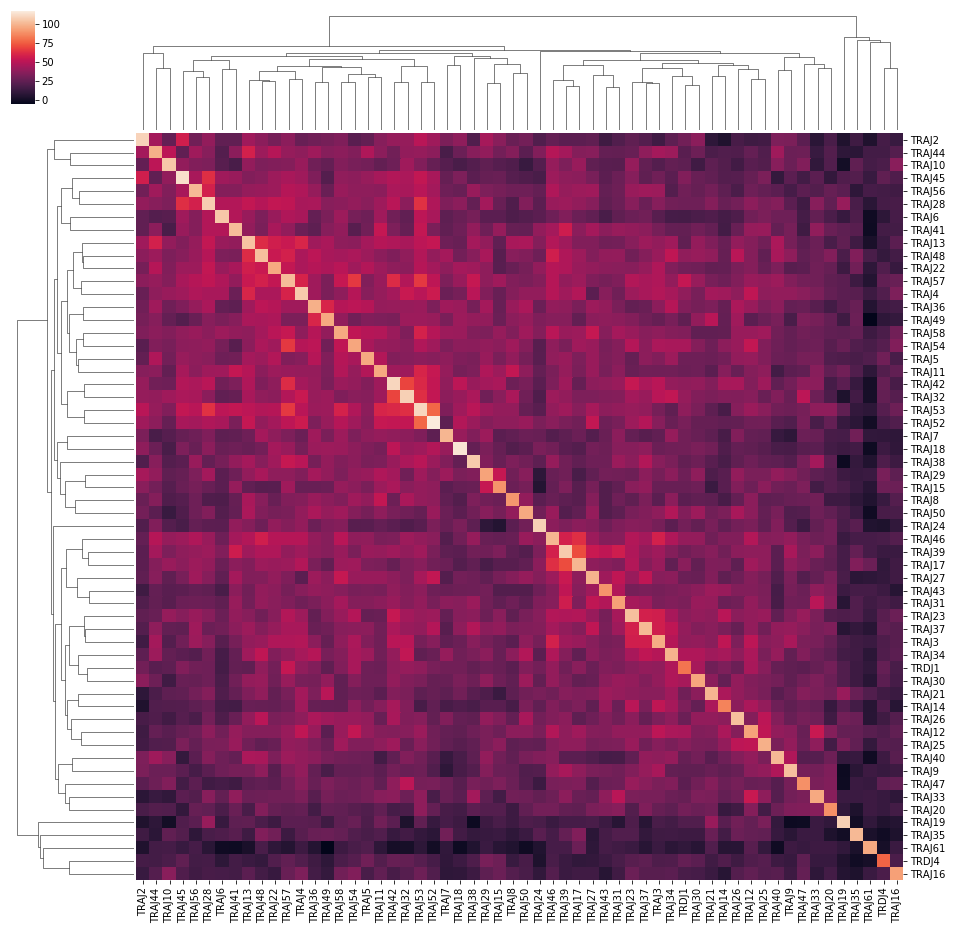

In [409]:

sns.clustermap(pd.DataFrame(dmatrix, index=aj_genes, columns=aj_genes), figsize=(16, 16))

In [145]:
data_pd.loc[data_pd.index[ship_indexes[1]]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3,index
155298,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPVNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF,155298
47694,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPSNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF,47694
20520,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPINSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF,20520
159057,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGGVNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF,159057
127941,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPVNSGYSTLTF,TRBV7-9,"TRBD2,TRBD1",TRBJ2-1,CASSLAGTYNEQFF,127941
162439,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPTNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLSGSYNEQFF,162439
167053,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPQNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF,167053
168937,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPGNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF,168937


In [19]:
ind = [155298, 47694, 20520, 159057, 127941, 162439, 167053, 168937]
core = antiindex[ind]

In [21]:
pwm_a = PWM(acdr3[core])
pwm_b = PWM(bcdr3[core])

indexes_bool = [(len(acdr3[j]) == len(acdr3[core[0]])) & 
                (len(bcdr3[j]) == len(bcdr3[core[0]])) for j in range(acdr3.shape[0])]
indexes = np.where(indexes_bool)[0]
acdr3i = acdr3[indexes]
bcdr3i = bcdr3[indexes]

ascores = np.array([pwm_a.Score(a) for a in acdr3i])
bscores = np.array([pwm_b.Score(b) for b in bcdr3i])

ascores = ascores - max(ascores)
bscores = bscores - max(bscores)

maxscore = 0
maxathr, maxbthr = 0, 0
for athr, bthr in itertools.product(np.arange(-10, 0), np.arange(-10, 0)):
    a, b = np.where(ascores > athr)[0], np.where(bscores > bthr)[0]
    indx = np.array(list(set(a) & set(b)))
    mu = a.shape[0] * b.shape[0] / acdr3i.shape[0]
    score = poisson.cdf(k=indx.shape[0], mu=mu)
    if maxscore < score:
        maxathr, maxbthr = athr, bthr
        maxscore = score

athr, bthr = maxathr, maxbthr
a, b = np.where(ascores > athr)[0], np.where(bscores > bthr)[0]
indx = np.array(list(set(a) & set(b)))
mu = a.shape[0] * b.shape[0] / acdr3i.shape[0]
score = poisson.cdf(k=indx.shape[0], mu=mu)

In [ ]:
indexes

In [27]:
a.shape[0], b.shape[0], mu, indx.shape[0], acdr3i.shape[0]

(9, 69, 0.06700474751834268, 8, 9268)

In [35]:
indx_set = set(indx)
for i in a:
    if not i in indx_set:
        print(data_pd.index[indexes[i]])

161003


In [37]:
data_pd.loc[data_pd.index[indexes[a]]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
20520,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPINSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
47694,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPSNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
127941,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPVNSGYSTLTF,TRBV7-9,"TRBD2,TRBD1",TRBJ2-1,CASSLAGTYNEQFF
155298,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPVNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
159057,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGGVNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
161003,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV27,TRAJ11,CAGGGNSGYSTLTF,"TRBV5-6,TRBV5-7,TRBV5-5","TRBD2,TRBD1",TRBJ1-2,CASSLGTAIYGYTF
162439,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPTNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLSGSYNEQFF
167053,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPQNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
168937,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPGNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF


In [47]:
trbv79 = data_pd['beta.v'] == 'TRBV7-9'
trav25 = data_pd['alpha.v'] == 'TRAV25'
traj11 = data_pd['alpha.j'] == 'TRAJ11'
e = np.sum(trbv79) * np.sum(trav25) / data_pd.shape[0]
print(np.sum(trbv79), np.sum(trav25), np.sum(trbv79 & trav25), data_pd.shape[0], e)
# data_pd.loc[trav25 & trbv79 & traj11]

5251 3459 120 169568 107.1146029911304


,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
20520,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPINSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
47694,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPSNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
64808,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPSEGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
127941,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPVNSGYSTLTF,TRBV7-9,"TRBD2,TRBD1",TRBJ2-1,CASSLAGTYNEQFF
155298,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPVNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
159057,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGGVNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
162439,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPTNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLSGSYNEQFF
167053,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPQNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF
168937,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV25,TRAJ11,CAGPGNSGYSTLTF,TRBV7-9,NaN,TRBJ2-1,CASSLAGSYNEQFF


In [58]:
print('trav25', np.sum(trav25))
print('traj11', np.sum(traj11))
print('trbv79', np.sum(trbv79))

e = np.sum(trav25) * np.sum(traj11) / data_pd.shape[0]
print('trav25 & traj11', np.sum(trav25 & traj11), ';expected=', e)
e = np.sum(trbv79) * np.sum(traj11) / data_pd.shape[0]
print('traj11 & trbv79', np.sum(traj11 & trbv79), ';expected=', e)
e = np.sum(trav25) * np.sum(trbv79) / data_pd.shape[0]
print('trbv79 & trav25', np.sum(trbv79 & trav25), ';expected=', e)

e = np.sum(trav25) * np.sum(trbv79) * np.sum(traj11) / data_pd.shape[0] ** 2
print('trbv79 & trav25 & traj11', np.sum(trav25 & trbv79 & traj11), ';expected=', e)

trav25 3459
traj11 2694
trbv79 5251
trav25 & traj11 61 ;expected= 54.95462587280619
traj11 & trbv79 91 ;expected= 83.42490328363843
trbv79 & trav25 120 ;expected= 107.1146029911304
trbv79 & trav25 & traj11 9 ;expected= 1.7017759274043764


Also let's note that trbj becomes also fixed.

In [155]:
data_pd.loc[data_pd.index[ship_indexes[5]]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3,index
164239,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASLSGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRQYGYTF,164239
123359,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASFSGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRADGYTF,123359
155197,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASIFGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSVDRNYGYTF,155197
13985,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASLAGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRSYGYTF,13985
48185,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASLAGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRAYGYTF,48185
21210,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASLSGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRNYGYTF,21210
110435,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAAVLRGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRSYGYTF,110435
13043,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASLNGGTSYGKLTF,TRBV27,TRBD1,TRBJ1-2,CASSFDRNYGYTF,13043
172951,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ52,CAASLYGGTSYGKLTF,TRBV27,NaN,TRBJ1-2,CASSFDRTYGYTF,172951


In [157]:
data_pd.loc[data_pd.index[ship_indexes[6]]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3,index
65932,tcr_ab_pairs,HomoSapiens,2,NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVVGYGQNFVF,TRBV9,NaN,TRBJ1-2,CASSVDPNYGYTF,65932
35812,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVEVYGQNFVF,"TRBV4-1,TRBV4-3,TRBV4-2,TRBV4-1,TRBV4-3",NaN,TRBJ1-2,CASSQDGNYGYTF,35812
160904,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVVSYGQNFVF,"TRBV4-1,TRBV4-3",NaN,TRBJ1-2,CASSQDGNYGYTF,160904
26923,tcr_ab_pairs,HomoSapiens,"3,2",NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVSSYGQNFVF,TRBV9,NaN,TRBJ1-2,CASSVDPNYGYTF,26923
92065,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVGVYGQNFVF,TRBV9,NaN,TRBJ1-2,CASSEDPNYGYTF,92065
36547,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVAPYGQNFVF,TRBV9,NaN,TRBJ1-2,CASSVDGNYGYTF,36547
18458,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVVLYGQNFVF,"TRBV5-4,TRBV5-8",NaN,TRBJ1-2,CASSPDGNYGYTF,18458
121246,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV12,TRAJ26,CVGNYGQNFVF,TRBV4-1,NaN,TRBJ1-2,CASSQDGNYGYTF,121246


Other 11 group are clones of these three.